In [88]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
df = pd.read_csv('PlayerPersonalData.csv')
# Сравним зависимость зарплаты от возраста игроков в самых крупных командах.
# График должен показать, есть ли в целом какая-то четкая корреляция

In [103]:
# Для этого найдем самые крупные команды:
df.groupby(['Club']).size().sort_values(ascending=False).head(10)

Club
Villarreal CF         35
UD Las Palmas         34
Manchester United     34
Borussia Dortmund     34
FC Nantes             34
Olympique Lyonnais    34
OGC Nice              34
VfL Wolfsburg         34
Everton               33
Southampton           33
dtype: int64

In [117]:
# Создадим для первых четырех команд отдельные датафреймы и отсортируем по возрасту:
vildf = df.loc[df['Club'] == 'Villarreal CF'].sort_values('Age')
paldf = df.loc[df['Club'] == 'UD Las Palmas'].sort_values('Age')
mandf = df.loc[df['Club'] == 'Manchester United'].sort_values('Age')
bordf = df.loc[df['Club'] == 'Borussia Dortmund'].sort_values('Age')

In [137]:
# Переведем зарплаты из строк в числа
vildf['NumWage'] = vildf.Wage.str.extract('(\d+)').astype(int)
paldf['NumWage'] = paldf.Wage.str.extract('(\d+)').astype(int)
mandf['NumWage'] = mandf.Wage.str.extract('(\d+)').astype(int)
bordf['NumWage'] = bordf.Wage.str.extract('(\d+)').astype(int)

Text(0, 0.5, 'Зарплата')

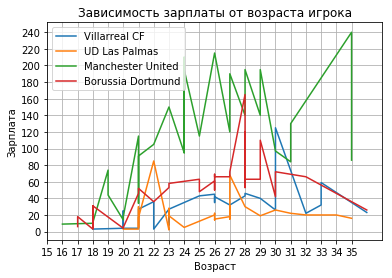

In [146]:
# Нарисуем:
fig, axes = plt.subplots()
axes.plot(vildf['Age'], vildf['NumWage'], label='Villarreal CF')
axes.plot(paldf['Age'], paldf['NumWage'], label='UD Las Palmas')
axes.plot(mandf['Age'], mandf['NumWage'], label='Manchester United')
axes.plot(bordf['Age'], bordf['NumWage'], label='Borussia Dortmund')
axes.set_title('Зависимость зарплаты от возраста игрока')
axes.grid()
axes.legend()
plt.xticks(range(15,36))
plt.yticks(range(0, 250, 20))
axes.set_xlabel('Возраст')
axes.set_ylabel('Зарплата')

In [144]:
# Как можно заметить, не во всех клубах прослеживается зависимость зарплаты от возраста игрока